In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision
from torchvision import transforms as T

In [10]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [11]:
COCO_INSTANCE_CATEGORY_NAMES  = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cellone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

In [12]:
def get_prediction(img_path, threshold):

#get_prediction
#parameters:
#- img_path - path of the input image
#- threshold - threshold value for prediction score method:
#- Image is obtained from the image path
#- the image is converted to image tensor using PyTorch&#39;s Transforms
#- image is passed through the model to get the predictions
#- class, box coordinates are obtained, but only prediction score &gt; threshold are chosen.

    img = Image.open(img_path)
    transform = T.Compose([T.ToTensor()])
    img = transform(img)
    pred = model([img])
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
    pred_score = list(pred[0]['scores'].detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x>threshold][-1]
    pred_boxes = pred_boxes[:pred_t+1]
    pred_class = pred_class[:pred_t+1]
    return pred_boxes, pred_class


In [28]:
def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=2, text_th=2):
    boxes, pred_cls = get_prediction(img_path, threshold)
    # Get predictions
    img = cv2.imread(img_path)
    # Read image with cv2
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # Convert to RGB
    for i in range(len(boxes)):
        (x1, y1), (x2, y2) = boxes[i]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cv2.rectangle(img, (x1, y1), (x2, y2),color=(0, 255, 0), thickness=rect_th)
        # Draw Rectangle with the coordinates
        cv2.putText(img,pred_cls[i], (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, text_size, (255, 255,0),thickness=text_th)
        # Write the prediction class
        plt.figure(figsize=(20,30))
        # display the output image
    plt.imshow(img) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.show()


<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

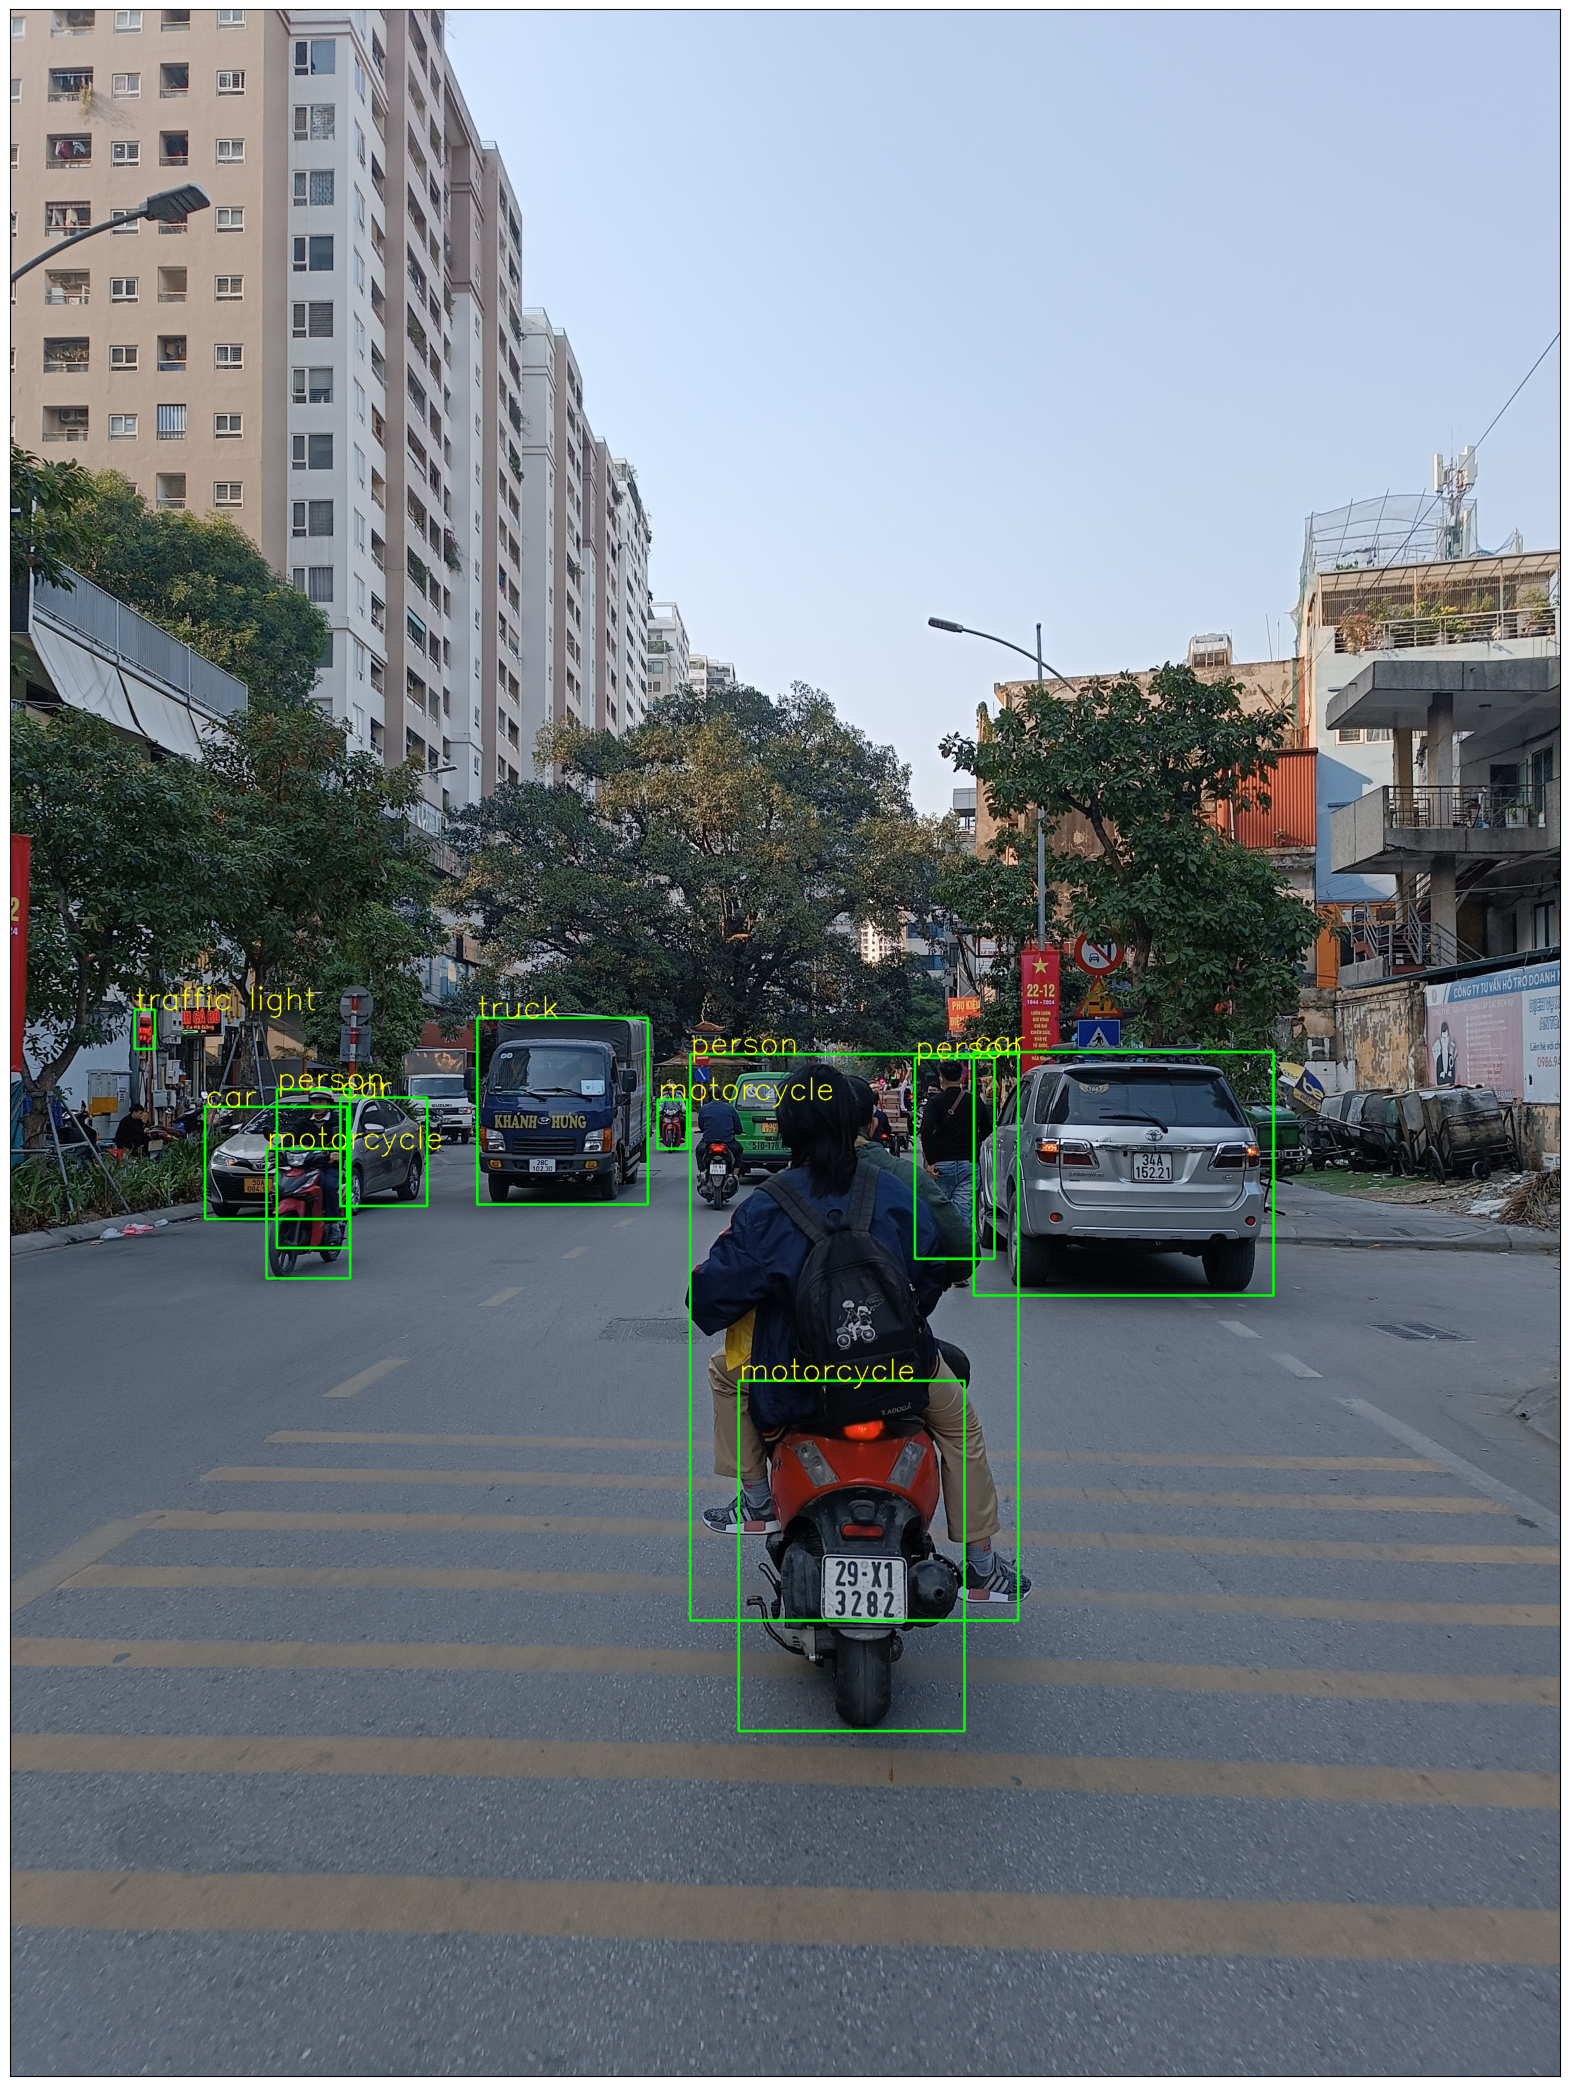

In [29]:
object_detection_api('D:/QG_2022/new_data/QG3581.jpg', threshold=0.8)

C:\Users\WinIF Chung\AppData\Local\Temp\ipykernel_13120\1310652289.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,30))


<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

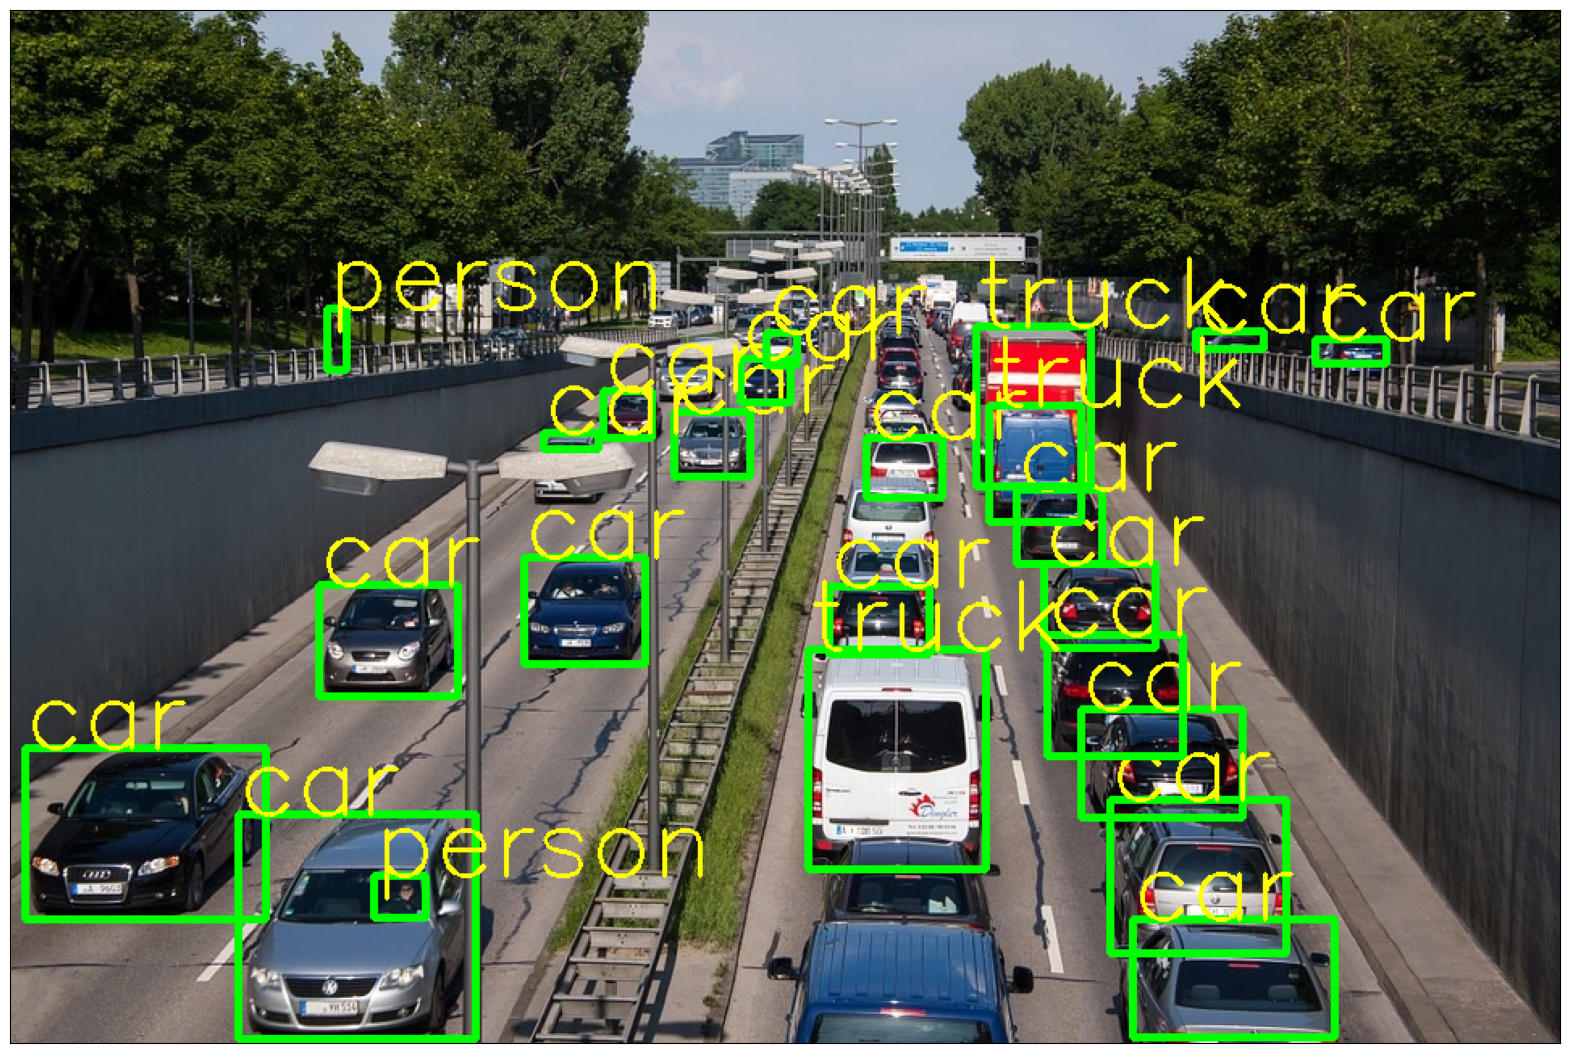

In [30]:
object_detection_api('D:/Teach_n_Train/Advanced_Lessons_CV/LABS/r-cnn/faster-rcnn/traffic.jpg', threshold=0.8)

In [16]:
cv2.__version__

'4.5.1'